# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [30]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [32]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [33]:
# TODO: Begin your EDA
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [34]:
#There are no non-null values in any of the columns. 
#We can determine this because, there are 1 million total entries and as we see in the chart above, 
#each column has 1 million non-null values.

In [35]:
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [ ]:
transactions.groupby("type")["amount"].count()
#this shows us the number of transactations by each type. 

type
CASH_IN     219955
CASH_OUT    351360
DEBIT         6417
PAYMENT     338573
TRANSFER     83695
Name: amount, dtype: int64

<Axes: xlabel='type'>

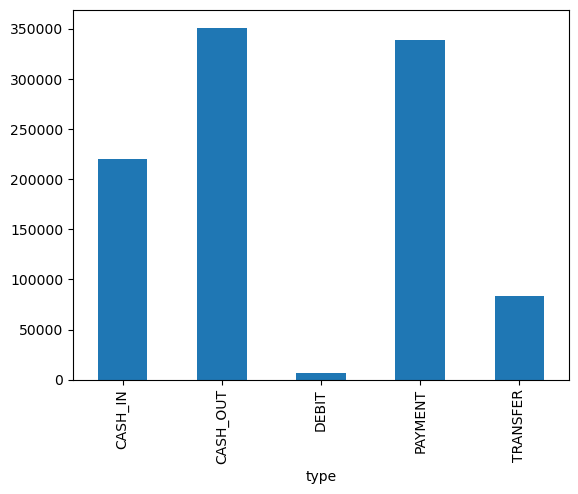

In [37]:
transactions.groupby("type")["amount"].count().plot.bar()

In [38]:
transactions.groupby("isFraud")["amount"].count()

isFraud
0    998703
1      1297
Name: amount, dtype: int64

In [39]:
transactions[transactions["isFraud"] == 1]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
439,CASH_OUT,530354.58,C1119661582,530354.58,0.0,C1171953426,4728783.51,5259138.09,1,0
982,TRANSFER,5429153.98,C2027207246,5429153.98,0.0,C1388180627,0.00,0.00,1,0
1084,CASH_OUT,834592.40,C851101642,834592.40,0.0,C1583598303,236428.35,1071020.75,1,0
1903,TRANSFER,2763398.31,C577803442,2763398.31,0.0,C619602282,0.00,0.00,1,0
1912,TRANSFER,296699.39,C1746633930,296699.39,0.0,C1032143722,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
997527,TRANSFER,2571605.04,C991826252,2571605.04,0.0,C2045424554,0.00,0.00,1,0
997654,CASH_OUT,1421665.98,C467140343,1421665.98,0.0,C1583441435,0.00,1421665.98,1,0
998488,TRANSFER,349627.64,C246515037,349627.64,0.0,C1455585247,0.00,0.00,1,0
998998,CASH_OUT,1749325.14,C1029257629,1749325.14,0.0,C1200877577,1327198.86,3076524.00,1,0


In [40]:
transactions.groupby("isFlaggedFraud")["amount"].count()

isFlaggedFraud
0    999999
1         1
Name: amount, dtype: int64

In [41]:
transactions[transactions["isFlaggedFraud"] == 1]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
564103,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1


In [42]:
#Using groupby and binning, we can see how fraud classification varies across different transction amounts.
transactions['amount_bin'] = pd.cut(transactions['amount'], bins=[0, 1000, 10000, 50000, 100000, 1000000])

transactions.groupby(['amount_bin', 'isFraud']).size().unstack().fillna(0)

C:\Users\klema\AppData\Local\Temp\ipykernel_12888\2084663706.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transactions.groupby(['amount_bin', 'isFraud']).size().unstack().fillna(0)


isFraud,0,1
amount_bin,,
"(0, 1000]",22405,13
"(1000, 10000]",179778,41
"(10000, 50000]",239195,102
"(50000, 100000]",113498,117
"(100000, 1000000]",423666,616


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

As we see in the histplots below, the values of the numeric features in the dataset have mostly normal distributions. Where we see a few rare outliers we can determine that those transactions should be looked at for fruadulent activiity. 



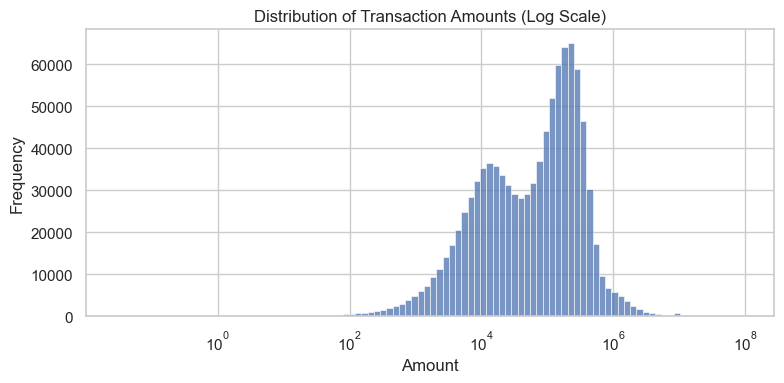

In [56]:
plt.figure(figsize=(8, 4))
sns.histplot(data=transactions, x="amount", bins=100, log_scale=True)
plt.title("Distribution of Transaction Amounts (Log Scale)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

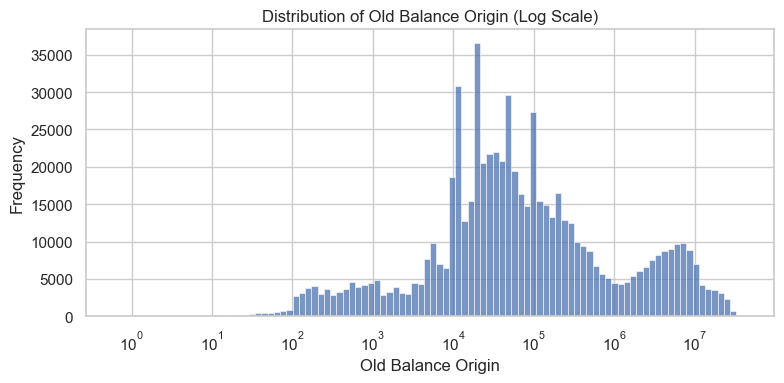

In [57]:
plt.figure(figsize=(8, 4))
sns.histplot(data=transactions, x="oldbalanceOrg", bins=100, log_scale=True)
plt.title("Distribution of Old Balance Origin (Log Scale)")
plt.xlabel("Old Balance Origin")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

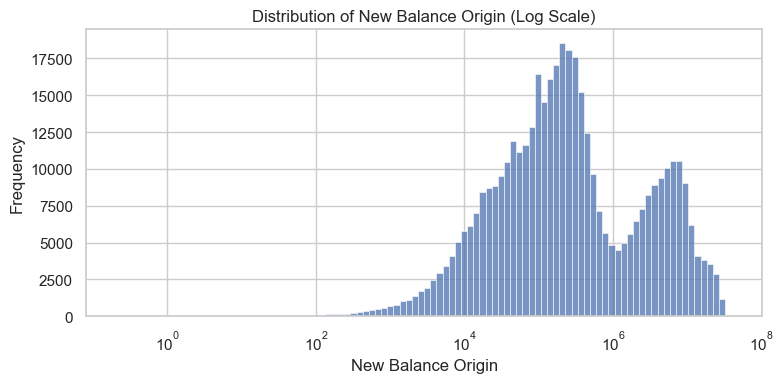

In [60]:
plt.figure(figsize=(8, 4))
sns.histplot(data=transactions, x="newbalanceOrig", bins=100, log_scale=True)
plt.title("Distribution of New Balance Origin (Log Scale)")
plt.xlabel("New Balance Origin")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

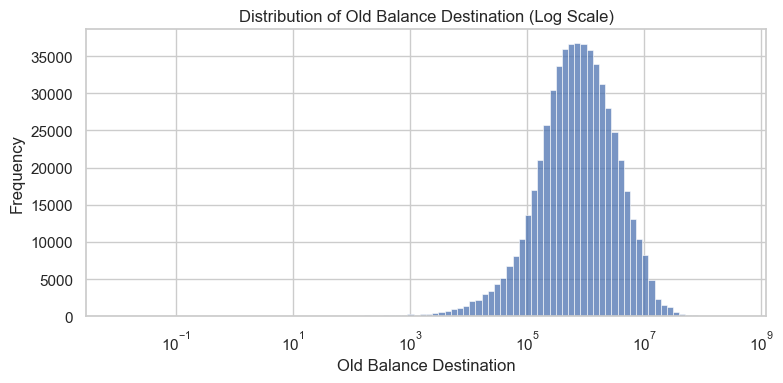

In [61]:
plt.figure(figsize=(8, 4))
sns.histplot(data=transactions, x="oldbalanceDest", bins=100, log_scale=True)
plt.title("Distribution of Old Balance Destination (Log Scale)")
plt.xlabel("Old Balance Destination")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

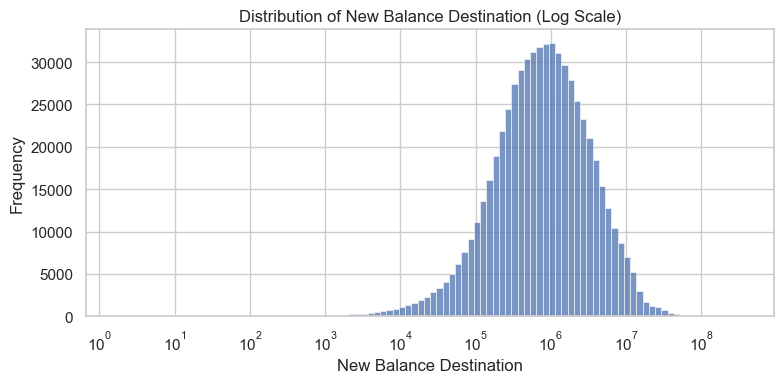

In [62]:
plt.figure(figsize=(8, 4))
sns.histplot(data=transactions, x="newbalanceDest", bins=100, log_scale=True)
plt.title("Distribution of New Balance Destination (Log Scale)")
plt.xlabel("New Balance Destination")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here
When we look at "Old Balance Origin" vs. Old Balance Destination", we see a tiny cluster of fraudlent transactions when Old Balance Destination has a very high transaction amount. Fraudulent transactions tend to occur when origin accounts have little or no funds, and destination accounts are disproportionately high.

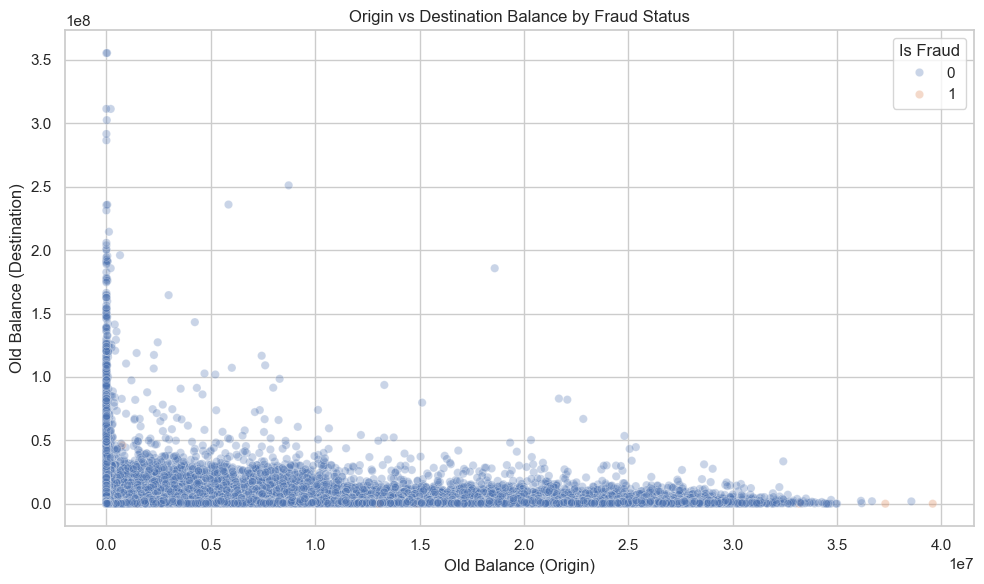

In [50]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x="oldbalanceOrg", y="oldbalanceDest", hue="isFraud", alpha=0.3)

# Add labels and title
plt.title("Origin vs Destination Balance by Fraud Status")
plt.xlabel("Old Balance (Origin)")
plt.ylabel("Old Balance (Destination)")
plt.legend(title="Is Fraud", loc="upper right")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Amount vs Old Balance (Origin) by Fraud Status')

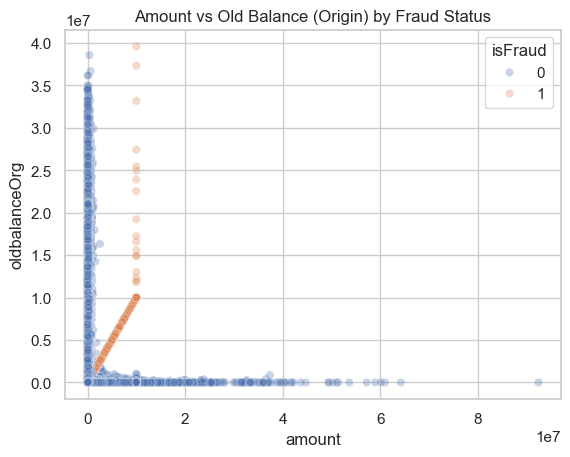

In [52]:
sns.scatterplot(data=transactions, x="amount", y="oldbalanceOrg", hue="isFraud", alpha=0.3)
plt.title("Amount vs Old Balance (Origin) by Fraud Status")

Text(0.5, 1.0, 'Amount vs New Balance (Destination) by Fraud Status')

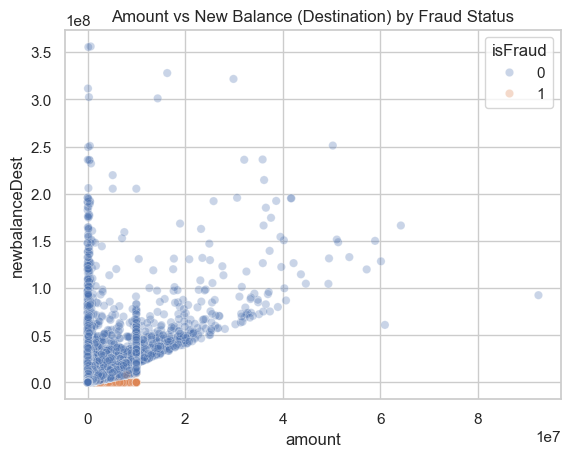

In [53]:
sns.scatterplot(data=transactions, x="amount", y="newbalanceDest", hue="isFraud", alpha=0.3)
plt.title("Amount vs New Balance (Destination) by Fraud Status")

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Transfers is only the second highest transaction type but has the highest average transaction amount. Deposits and withdrawals also have large average transaction amounts but not nearly as high as transfers. 

In [ ]:
transactions.groupby('type')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,219955.0,168928.914668,1.267864e+05,0.43,70092.845,142942.990,240085.0800,1609288.13
CASH_OUT,351360.0,175584.659320,1.703743e+05,0.00,72382.815,146209.915,245881.7625,10000000.00
DEBIT,6417.0,5445.890813,1.302416e+04,5.24,1530.240,3099.530,5423.2500,389762.68
PAYMENT,338573.0,13055.592085,1.256291e+04,0.03,4377.100,9481.670,17565.5600,230549.18
TRANSFER,83695.0,911827.155179,1.896175e+06,2.60,217105.800,487883.710,978027.6650,92445516.64


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

As we can see on the pivot table below, transaction amounts do vary when we compare fraudulent transactions to non-fraudulaent transactions. Under the Fraud label (1), the type of transactions with the highest average transaction amounts are Cash out and Transfer. Cash in, Debit and Payment have no transactions that are lableled as fraud.

In [ ]:
pd.pivot_table(transactions, values='amount', index='type', columns='isFraud', aggfunc='mean')

isFraud,0,1
type,,
CASH_IN,168928.914668,NaN
CASH_OUT,173427.674988,1.326971e+06
DEBIT,5445.890813,NaN
PAYMENT,13055.592085,NaN
TRANSFER,908187.358989,1.384176e+06


## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Out of 1 million transactions, there is only 1 transaction that is flagged as fraud. This is highly problematic. While our EDA shows that there are far less fraudlent transactions than there are real transactions, the fact that this system only flagged one is alarming and proves that the system needs to be improved. We will explore how we can improve on this system in our model_train notebook.

In [ ]:
transactions.groupby("isFlaggedFraud")["amount"].count()

isFlaggedFraud
0    999999
1         1
Name: amount, dtype: int64

In [ ]:
transactions[transactions["isFlaggedFraud"] == 1]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_bin
564103,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,"(100000, 1000000]"
